In [300]:
#by PPolosin
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("laptop_price.csv", encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [301]:
def plot_scatter(x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, size, alpha, prediction="None"):
    plt.figure(figsize=(12,12))
    ax = sns.scatterplot(data = df, y = y, x = x,
                 linewidth = 1.2, color = color, s = size, alpha = alpha, marker = "o", edgecolor = "black")
    
    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    if (prediction != "None"):
      plt.plot(X, prediction, color='red', linewidth=2)
    plt.show()


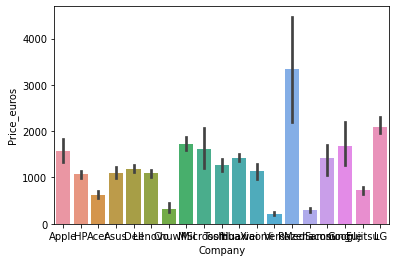

In [302]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.show()



In [303]:
#EDA
df.drop(columns = 'laptop_ID', inplace = True)
print(df.info())
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB
None


Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [304]:
df['Weight'] = df['Weight'].str.replace('kg','')
df["Weight"] = df["Weight"].str.extract('(\d*\.?\d*)', expand=False).astype(float)
pd.to_numeric(df['Weight'], errors='coerce')

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [305]:
categorical = []
for el in df.columns:
  if el != "Price_euros" and el!="Inches" and el!= "Weight" and el!="Product":
    categorical.append(el)
print(categorical)

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys']


In [306]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [307]:
from sklearn import preprocessing
label_object = {} # label_object['name'].inverse_transform(df['name']) 

for el in categorical:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(df[el])
  df[el] = label_encoder.transform(df[el])
  label_object[el] = label_encoder
  
print(df.head())
df.dtypes

   Company      Product  TypeName  Inches  ...  Gpu  OpSys  Weight  Price_euros
0        1  MacBook Pro         4    13.3  ...   58      8    1.37      1339.69
1        1  Macbook Air         4    13.3  ...   51      8    1.34       898.94
2        7       250 G6         3    15.6  ...   53      4    1.86       575.00
3        1  MacBook Pro         4    15.4  ...    9      8    1.83      2537.45
4        1  MacBook Pro         4    13.3  ...   59      8    1.37      1803.60

[5 rows x 12 columns]


Company               int64
Product              object
TypeName              int64
Inches              float64
ScreenResolution      int64
Cpu                   int64
Ram                   int64
Memory                int64
Gpu                   int64
OpSys                 int64
Weight              float64
Price_euros         float64
dtype: object

In [308]:
# Регрессия
categorical.append("Weight")
categorical.append("Inches")
X = df[categorical].values
Y = df['Price_euros'].values
features = pd.Series(categorical)
features

0             Company
1            TypeName
2    ScreenResolution
3                 Cpu
4                 Ram
5              Memory
6                 Gpu
7               OpSys
8              Weight
9              Inches
dtype: object

In [309]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Создадим модель линейной регрессии
slr = LinearRegression()

# Применим линейную регрессию к нашему набору данных 
slr.fit(X, Y)

# так как у нас много признаков,
# то у нас будет много разных коэффицентов для каждого признака
# сохраним их все в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features
print(slr.intercept_)
coeff_df


67.65902494116358


,Coefficient,features
0,15.392332,Company
1,35.484244,TypeName
2,17.368249,ScreenResolution
3,9.780060,Cpu
4,-38.199544,Ram
5,12.576209,Memory
6,4.927200,Gpu
7,134.610183,OpSys
8,335.268722,Weight
9,-108.877604,Inches


In [310]:
# MSE:
from sklearn.metrics import mean_squared_error
y_true = Y
y_pred = slr.predict(X)
mean_squared_error(y_true, y_pred)

245837.7012297206

Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводов о том, на сколько хорошо данная модель решает задачу. Например, MSE = 10 является очень плохим показателем, если целевая переменная принимает значения от 0 до 1, и очень хорошим, если целевая переменная лежит в интервале (10000, 100000). 

Целевая перменная лежит в интервале от (0:4000), таким образом точность прогноза достаточно невелика*(MSE = 245837)*


**Уравнение регрессии:**
(15.392332*Company)+ ( 35.48424443700039 * TypeName )+( 17.36824885917187 * ScreenResolution )+( 9.780059999405234 * Cpu )+( -38.1995442751531 * Ram )+( 12.57620915163044 * Memory )+( 4.927200339941893 * Gpu )+( 134.61018341185255 * OpSys )+( 335.26872204097975 * Weight )+( -108.8776042439722 * Inches ) + 67.65902494116358 






Около нулевых признаков нет, поэтому все они оказывают влияние на итоговое предсказание. Однако наименьшее влияние оказывают параметры Memory, Gpu и Cpu, так как их коэффиценты сравнительно мало по отношению к другим параметрам.


In [311]:
s = ""
for i in range(1, 10):
  print("(", coeff_df['Coefficient'].iloc[i], "*", coeff_df['features'].iloc[i], ")", end = "+", sep = " ")

( 35.48424443700039 * TypeName )+( 17.36824885917187 * ScreenResolution )+( 9.780059999405234 * Cpu )+( -38.1995442751531 * Ram )+( 12.57620915163044 * Memory )+( 4.927200339941893 * Gpu )+( 134.61018341185255 * OpSys )+( 335.26872204097975 * Weight )+( -108.8776042439722 * Inches )+

In [312]:
# Сделаем все тоже самое, но только возьмем один признак для построениея модели

# выделим вектор признака и вектор ответов
X = df[['Weight']].values
y = df['Price_euros'].values

# создадим модель линейной регрессии
slr = LinearRegression()

slr.fit(X, y)

y_pred = slr.predict(X)

print('Slope: ', slr.coef_) # k
print('Intercept:', slr.intercept_) # b

Slope:  [220.9707054]
Intercept: 673.1865696387358


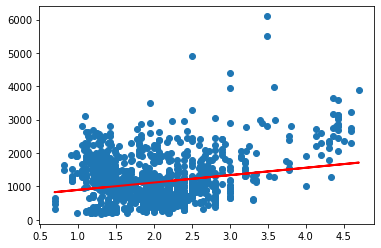

In [313]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)

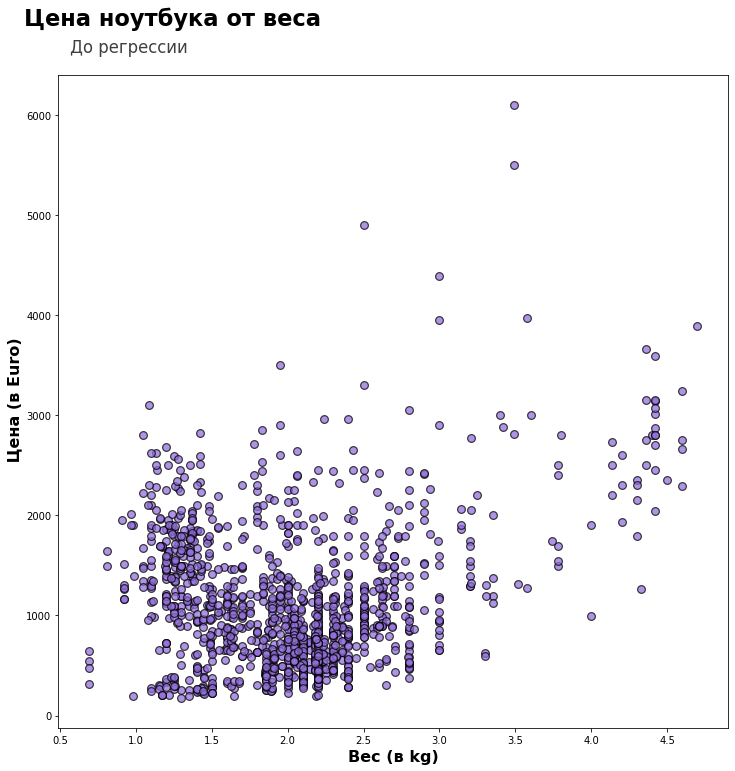

In [314]:
plot_scatter(x = "Weight", y = "Price_euros", ylabel = ' Цена (в Euro)', xlabel = "Вес (в kg)", title = "Цена ноутбука от веса",
             subtitle = "До регрессии", color = "mediumpurple", title_position = 0.17, subtitle_position = 0.105, 
             size = 60, alpha = 0.75)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


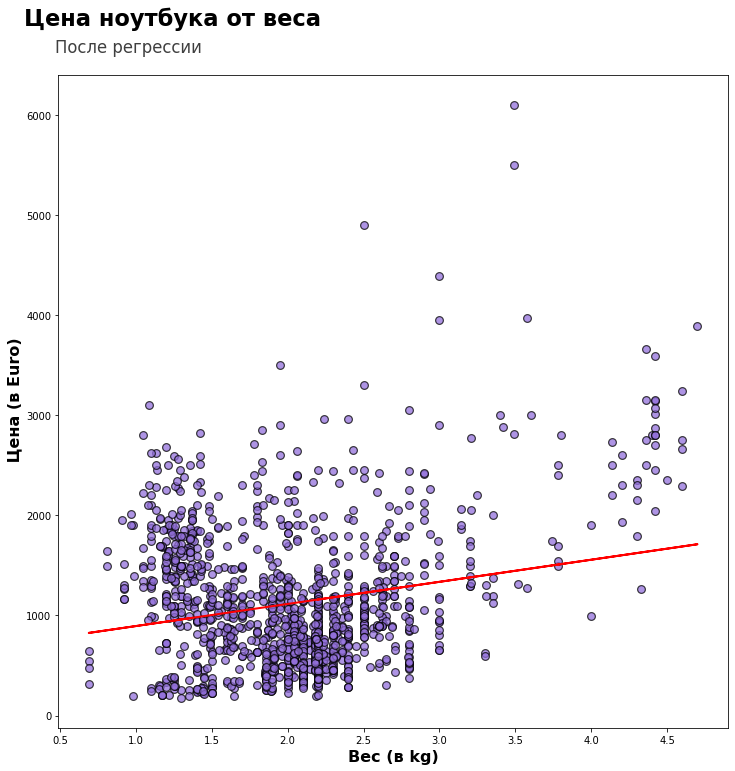

In [315]:
plot_scatter(x = "Weight", y = "Price_euros", ylabel = ' Цена (в Euro)', xlabel = "Вес (в kg)", title = "Цена ноутбука от веса",
             subtitle = "После регрессии", color = "mediumpurple", title_position = 0.17, subtitle_position = 0.105, 
             size = 60, alpha = 0.75,  prediction = slr.predict(X))